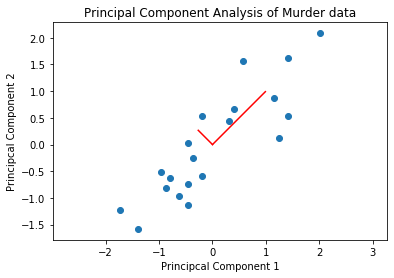

In [8]:
#Exercise 1a
import numpy as np
import matplotlib.pyplot as plt

def pca(data):
    '''Return an array of eigen vectors and eigenvalues for a long dataset'''
    cov_matrix = np.cov(data.T) # transpose to get the correct covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # calculate eigen stuff
    eigenvalues = eigenvalues[::-1] # reverse sort array
    eigenvectors = eigenvectors[:,::-1] # reverse sort matrix
    return eigenvectors, eigenvalues

def standardize_data(data):
    '''Transforms the data so that mean = 0 and sd = 1'''
    mean = np.mean(data, axis = 0)
    sd = np.std(data, axis = 0)
    data = (data - mean)/sd
    return data

def center_data(data):
    mean = np.mean(data, axis)



#Exercise 1b
murder = np.loadtxt("murderdata2d.txt")
murder = standardize_data(murder)
eigenvectors, eigenvalues = pca(murder)

#calculate Standard Deviation
sd_x = np.sqrt(eigenvalues[0])
sd_y = np.sqrt(eigenvalues[1])

#Plot figure
plt.scatter(murder[:,0], murder[:,1])
plt.axis('equal')
plt.plot([0, sd_x*eigenvectors[0,0]], [0, sd_x*eigenvectors[1,0]], "red")
plt.plot([0, sd_y*eigenvectors[0,1]], [0, sd_y*eigenvectors[1,1]], "red")
plt.title('Principal Component Analysis of Murder data')
plt.xlabel('Principcal Component 1')
plt.ylabel('Principcal Component 2')
plt.savefig("figure1_PCAmurder.png", dpi = 200)

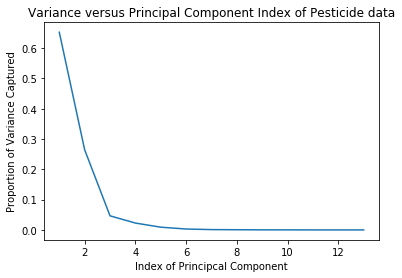

In [23]:
#Exercise 1c plot1
def min_dimensions(N, cum_variance):
    value = cum_variance[cum_variance > N][0] # get the first value which is bigger than N
    ind = np.where(cum_variance == value)[0][0] # return the index of that value
    ind = ind + 1 # python indexing starts at 0
    print(f"{ind} PCs are needed to capture {N*100}% of the variance")
    return ind

pesticide = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
pesticide = pesticide[:,:-1]
eigenvectors, eigenvalues = pca(pesticide)
variance = eigenvalues/sum(eigenvalues)
count = list(range(1, len(variance)+1))

plt.plot(count, variance)
plt.title('Variance versus Principal Component Index of Pesticide data')
plt.xlabel('Index of Principcal Component')
plt.ylabel('Proportion of Variance Captured')
plt.savefig("figure2_variance.png", dpi = 200)

2 PCs are needed to capture 90.0% of the variance
3 PCs are needed to capture 95.0% of the variance


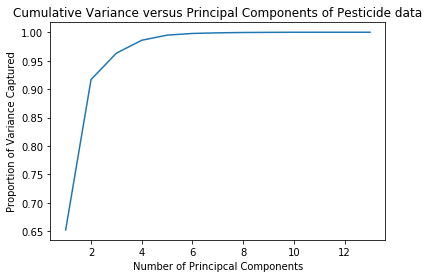

In [24]:
# Exercise 1c plot2
cum_variance = np.cumsum(eigenvalues/sum(eigenvalues))

min_dimensions(0.9, cum_variance)
min_dimensions(0.95, cum_variance)

plt.plot(count, cum_variance)
plt.title('Cumulative Variance versus Principal Components of Pesticide data')
plt.xlabel('Number of Principcal Components')
plt.ylabel('Proportion of Variance Captured')
plt.savefig("figure3_cumvariance.png", dpi = 200)

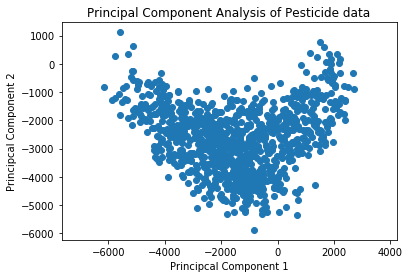

In [11]:
# Exercise 2
def mds(data, d):
    eigenvectors, eigenvalues = pca(data) # calculate eigenvectors
    eigenvectors = eigenvectors[:, :d] # select first d eigenvectors
    data = eigenvectors.T @ data.T # transpose EV to d*D matrix, transpose data to D*N matrix, get d*N matrix
    data = data.T #transpose to N*d matrix
    return data

transformed_pesticide = mds(pesticide, 2)

plt.scatter(transformed_pesticide[:,0], transformed_pesticide[:,1])
plt.axis('equal')
plt.title('Principal Component Analysis of Pesticide data')
plt.xlabel('Principcal Component 1')
plt.ylabel('Principcal Component 2')
plt.savefig("figure4_PCApesticide.png", dpi = 200)

In [5]:
#Exercise 3
#Exercise 3
def initialize_kmeans(k, data):
    '''Create a list of k centroids (the first k values of the dataset)'''
    means = []
    for i in range(k):
        means.append(data[i])
    return means

def get_loss(means, data):
    '''Takes in a list of centroids and the data and returns the loss'''
    loss = 0
    for i in means:
        loss += sum(np.linalg.norm(data - i, axis = 1)**2) # loss = [distance(x - mu)]^2
    return loss

def get_newmean(means, data):
    '''Takes in a list of centroids and the data and returns a new list of centroids'''
    k = len(means)
    new_means = []
    distance_matrix = []
    for i in range(k): # create a matrix of distances from the centroid for each centroid
        distance = np.linalg.norm(data - means[i], axis = 1)
        distance_matrix.append(distance)
    distance_matrix = np.array(distance_matrix).T # Transpose so that the row number of the dist matrix matches the data row
    index = np.argmin(distance_matrix, axis = 1) # Find the closest centroid
    for i in range(k):
        cluster = data[np.where(index == i)] # Subset the data for each cluster
        new_mean = np.mean(cluster, axis = 0) # calculate the mean of each cluster
        new_means.append(new_mean)
    return new_means

def kmean(k, data):
    '''Calculate k mean clusters for the data'''
    means = initialize_kmeans(k, data)
    old_loss = get_loss(means, data)
    n = 0
    
    while True:
        n += 1
        means = get_newmean(means, data)
        new_loss = get_loss(means, data)
        print(f"interation: {n}, start loss: {old_loss}, new loss: {new_loss}")
        if new_loss == old_loss:
            return means
            break
        else:
            old_loss = new_loss

centroids = kmean(2, pesticide)
print(f"Centroid 1: {centroids[0]}")
print(f"Centroid 2: {centroids[1]}")

interation: 1, start loss: 15048080986.0, new loss: 13221595946.929083
interation: 2, start loss: 13221595946.929083, new loss: 12598954252.023859
interation: 3, start loss: 12598954252.023859, new loss: 12425529048.38263
interation: 4, start loss: 12425529048.38263, new loss: 12377521726.08193
interation: 5, start loss: 12377521726.08193, new loss: 12565911210.008001
interation: 6, start loss: 12565911210.008001, new loss: 14219260248.633469
interation: 7, start loss: 14219260248.633469, new loss: 15415310175.127594
interation: 8, start loss: 15415310175.127594, new loss: 15525877664.674454
interation: 9, start loss: 15525877664.674454, new loss: 15398357743.994211
interation: 10, start loss: 15398357743.994211, new loss: 15263799974.65448
interation: 11, start loss: 15263799974.65448, new loss: 15175004412.89533
interation: 12, start loss: 15175004412.89533, new loss: 15117432604.178635
interation: 13, start loss: 15117432604.178635, new loss: 15065335687.074368
interation: 14, start

In [6]:
#Test with schi kit
from sklearn.cluster import KMeans
start = np.vstack((pesticide[0,], pesticide[1,]))
kmeans = KMeans(2, n_init = 1, init= start, algorithm = "full").fit(pesticide)
print(kmeans.cluster_centers_)

[[5.69426752e+00 4.93800425e+01 7.91594480e+02 3.84771338e+03
  3.38588535e+03 1.35988535e+03 2.93734607e+02 1.31609342e+02
  7.07282378e+01 3.96433121e+01 1.94437367e+01 4.23566879e+00
  4.41613588e-01]
 [2.19092628e+00 1.37315690e+01 1.70943289e+02 1.39436484e+03
  3.18853497e+03 2.62461815e+03 1.00372023e+03 6.32814745e+02
  4.95829868e+02 2.95400756e+02 1.45809074e+02 2.91984877e+01
  2.83742911e+00]]


# Exercise 3
```
Centroid 1: [5.70726496e+00 4.93012821e+01 7.92408120e+02 3.85595940e+03
 3.38821368e+03 1.35652778e+03 2.91737179e+02 1.29989316e+02
 6.86111111e+01 3.81880342e+01 1.87692308e+01 4.13461538e+00
 4.42307692e-01]
Centroid 2: [2.19924812e+00 1.40018797e+01 1.73727444e+02 1.40094549e+03
 3.18759962e+03 2.62043985e+03 1.00147368e+03 6.31413534e+02
 4.95295113e+02 2.95238722e+02 1.45689850e+02 2.91466165e+01
 2.82330827e+00]
 ```
The function creates a list of distances from each data point to a centroid for k centroids and converts this to a matrix. It then finds the lowest distance for each centroid, and assigns the data point for the corresponding distance to a cluster to make k clusters. The new centroids are then obtained by finding the mean of each cluster. The loss is also calculated for all clusters. This cycle is repeated until the loss in one cycle is the same as the previous cycle, indicating no change in centroids.

# Exercise 4

1. **How is probability interpreted differently in the frequentist and Bayesian views?**  
You the frequentist view, the probability of an event is essentially the frequency of that event occuring after many trials. The Bayesian view of probability is a measure of the belief of that event occurring.

2. **Cheap, efficient computers played a major role in making Bayesian methods mainstream. Why?**  
Bayesian methods require large amounts of sampling which was difficult to do before cheap and efficient computers became mainstream.

3. **What is the difference between a Bayesian credible interval and a frequentist confidence interval?**  
A 95% frequentist confidence interval means the confidence interval will contain the true value 95 out of 100 times. The Bayesian credible interval indicates that the data will be in the interval 95% of the time

4. **How does a maximum likelihood estimate approximate full Bayesian inference?**  
skagssdsdsdjk

5. **When will point estimates be a good approximation of full Bayesian inference?**  
Point estimates are a good approximation when the distribution is unimodal and has a narrow peak.